Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
Problem 2:
Which factors are important
Problem 3:
Which algorithms are best for this dataset

In [55]:
import pandas as pd
# df_columns=pd.read_csv("C:/Users/pragupta/Desktop/Submission/Project_6/adult.names")
adult=pd.read_csv("C:/Users/pragupta/Desktop/Submission/Project_6/adult.data", header=None, delimiter=r"\s+",)

In [52]:
from IPython.display import display
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
# from sklearn_pandas import DataFrameMapper

import numpy as np


In [57]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


In [68]:
adult.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [69]:
adult.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


In [59]:
adult.isnull().values.any()


False

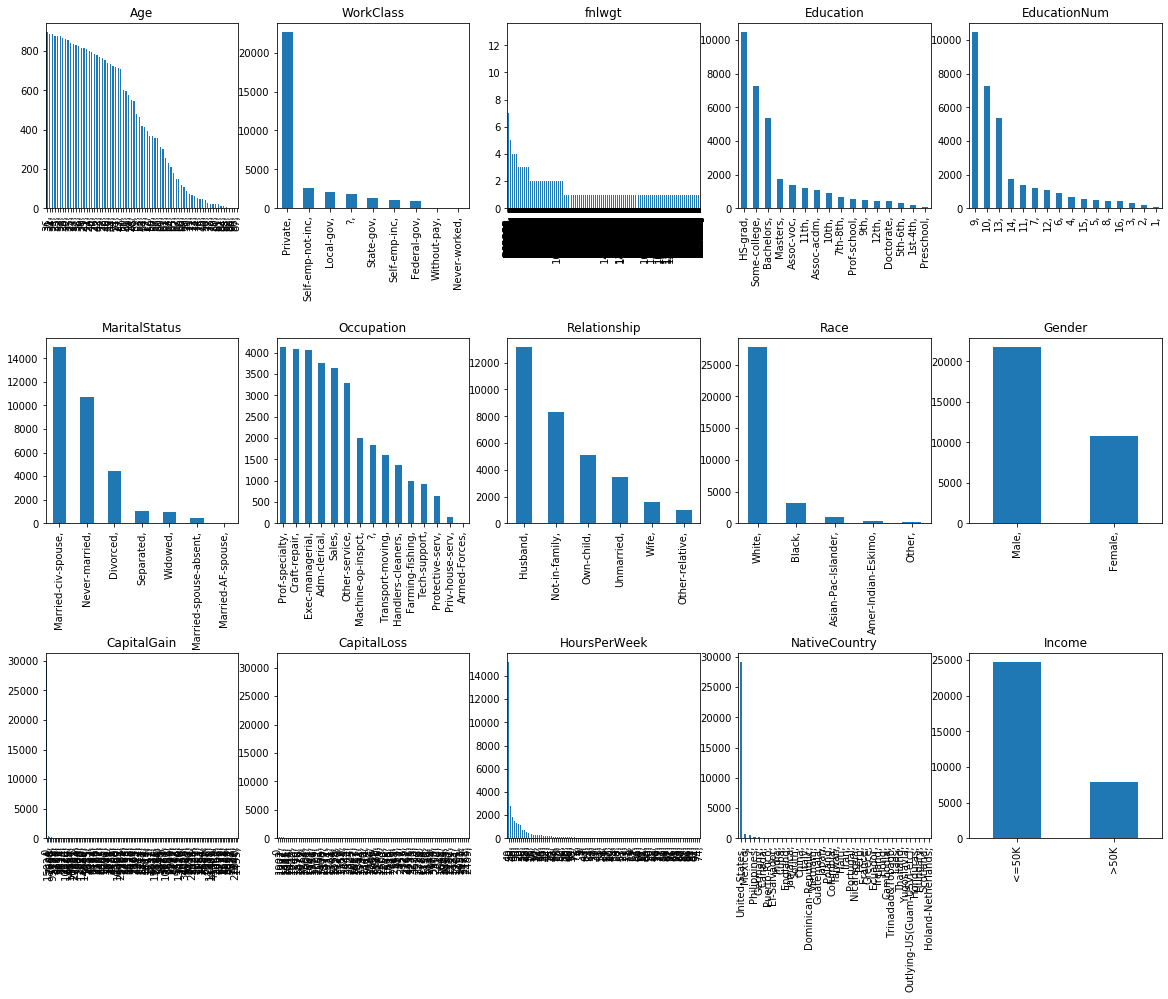

In [95]:
from math import ceil
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [98]:
# (adult["Country"].value_counts() / adult.shape[0]).head()
adult.head()


,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


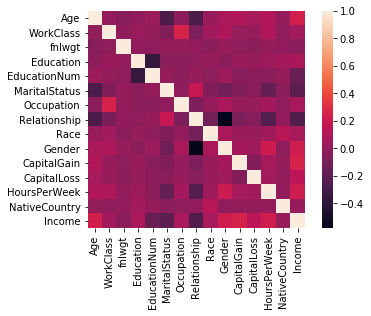

In [102]:
import sklearn.preprocessing as preprocessing
import seaborn as sns
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(adult)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [103]:
del adult["Education"]


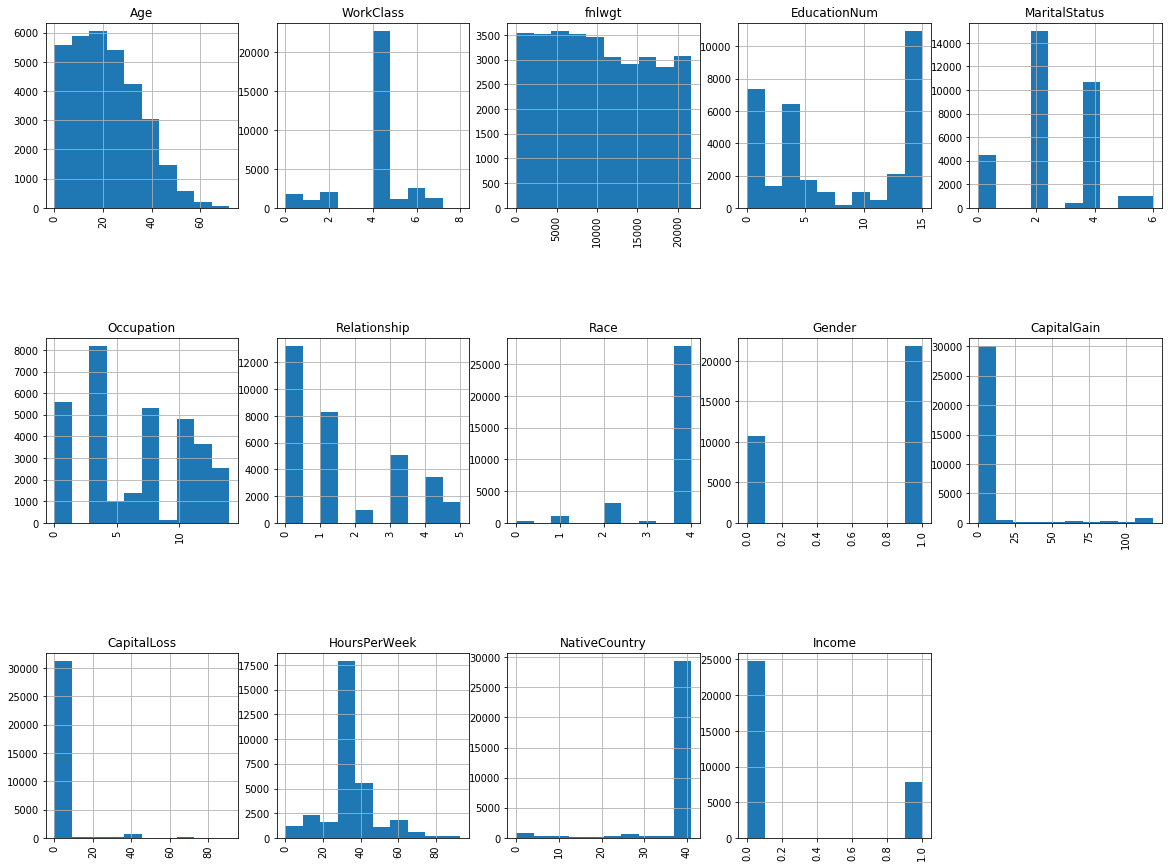

In [104]:
encoded_data, encoders = number_encode_features(adult)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [115]:
encoded_data

,Age,WorkClass,fnlwgt,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,22,7,20429,4,4,1,1,4,1,33,0,34,39,0
1,33,6,20691,4,2,4,0,4,1,0,0,4,39,0
2,21,4,10268,15,0,6,1,4,1,0,0,34,39,0
3,36,4,11553,13,2,6,0,2,1,0,0,34,39,0
4,11,4,16170,4,2,10,5,2,0,0,0,34,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,12825,3,2,13,5,4,0,0,0,31,39,0
32557,23,4,4223,15,2,7,0,4,1,0,0,34,39,1
32558,41,4,4026,15,6,1,4,4,0,0,0,34,39,0
32559,5,4,9041,15,4,1,3,4,1,0,0,12,39,0


In [124]:
# from sklearn.model_selection import train_test_split
cols =[i for i in encoded_data.columns if i !=["Income"]]
X =encoded_data[cols]
Y =encoded_data["Income"]
# X.head()



In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("str")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))


In [132]:
encoders

{'Age': LabelEncoder(),
 'WorkClass': LabelEncoder(),
 'fnlwgt': LabelEncoder(),
 'EducationNum': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Occupation': LabelEncoder(),
 'Relationship': LabelEncoder(),
 'Race': LabelEncoder(),
 'Gender': LabelEncoder(),
 'CapitalGain': LabelEncoder(),
 'CapitalLoss': LabelEncoder(),
 'HoursPerWeek': LabelEncoder(),
 'NativeCountry': LabelEncoder(),
 'Income': LabelEncoder()}

F1 score: 1.000000


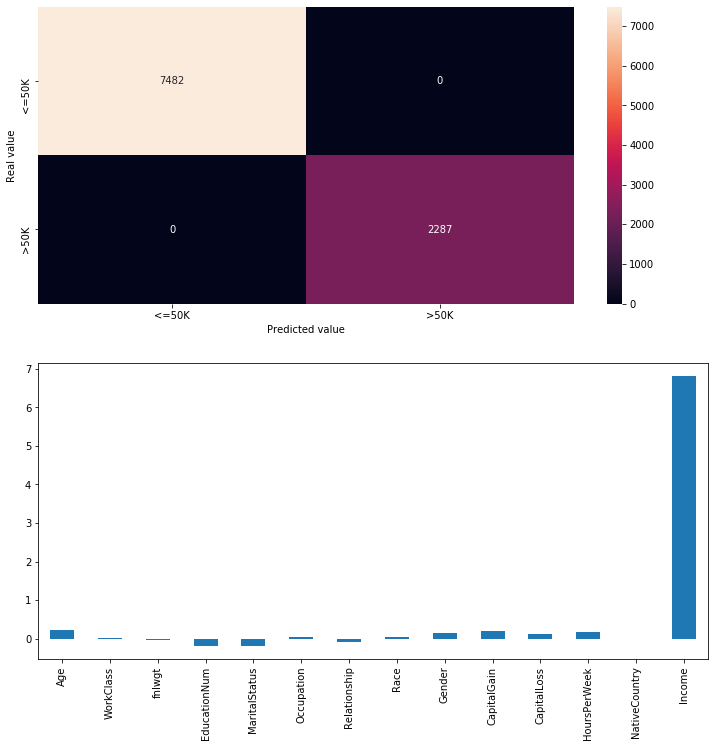

In [135]:
from sklearn import linear_model
from sklearn import  metrics
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Income"].classes_, yticklabels=encoders["Income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
# coefs.sort()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()